In [158]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import seaborn as sns
from config import DATA_PATH

# Get airbnb dataset of interest 

This website has a ton of scraped data from AirBnB for different cities and regions around the world.

Here is the [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596) for the 2024 data.

In [159]:
url = 'https://data.insideairbnb.com/portugal/lisbon/lisbon/2024-03-18/data/listings.csv.gz'
local_path = DATA_PATH
file_name = '2024-03-18-lisbon-listings.csv'

# save file locally
urlretrieve(url, local_path + file_name)

('/Users/katialopes-gilbert/repos/streamlit-demo/data2024-03-18-lisbon-listings.csv',
 <http.client.HTTPMessage at 0x339b1c890>)

In [160]:
df = pd.read_csv(local_path + file_name, compression='gzip', dtype={'id': str})

In [161]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [162]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,935509480248268779,https://www.airbnb.com/rooms/935509480248268779,20240318023624,2024-03-18,city scrape,RC pascoal Q3,"This special place is close to everything, whi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,236955701,https://www.airbnb.com/users/show/236955701,Vagner,2019-01-16,"Lisbon, Portugal","Ola, sou o Vagner amo viajar, trabalho bastan...",a few days or more,46%,84%,f,https://a0.muscache.com/im/pictures/user/cdc94...,https://a0.muscache.com/im/pictures/user/cdc94...,NaN,31,32,"['email', 'phone']",t,t,NaN,Arroios,Lisboa,38.731989,-9.138308,Private room in rental unit,Private room,1,2.5,2.5 baths,1.0,1.0,"[""TV"", ""Fire extinguisher"", ""Washer"", ""Kitchen...",$30.00,1,365,1,1,365,365,1.0,365.0,NaN,t,1,31,61,61,2024-03-18,9,9,0,2023-07-27,2023-12-25,3.89,4.11,4.22,3.89,3.67,4.44,4.11,115251/AL,t,31,5,26,0,1.14
1,1033186766563842755,https://www.airbnb.com/rooms/1033186766563842755,20240318023624,2024-03-18,city scrape,"Twin room city center, tourists spot, city centre",Ideal accommodation for people coming to visit...,The neighborhood is awesome. You have also a b...,https://a0.muscache.com/pictures/6c6b81fd-eae7...,185898036,https://www.airbnb.com/users/show/185898036,Flavio,2018-04-23,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/ab60f...,https://a0.muscache.com/im/pictures/user/ab60f...,Hampstead,178,230,"['email', 'phone']",t,t,"Lisboa, Portugal",Arroios,Lisboa,38.727730,-9.142410,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,2.0,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",$32.00,1,365,1,3,365,365,1.6,365.0,NaN,t,3,3,3,3,2024-03-18,5,5,1,2023-12-06,2024-02-26,4.40,4.60,4.20,5.00,5.00,4.60,4.40,Exempt,t,110,18,92,0,1.44
2,955103410770875754,https://www.airbnb.com/rooms/955103410770875754,20240318023624,2024-03-18,city scrape,Central Lisbon Stylish Apartment,Feel the breeze and become yourself a natural ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,531095694,https://www.airbnb.com/users/show/531095694,Luís,2023-08-10,"Odivelas, Portugal",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/6c966...,https://a0.muscache.com/im/pictures/user/6c966...,NaN,1,1,"['email', 'phone']",t,t,NaN,Estrela,Lisboa,38.708280,-9.170880,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""TV"", ""Fire extinguisher"", ""Gen\u00e9rico sha...",$75.00,3,31,3,3,31,31,3.0,31.0,NaN,t,4,5,23,266,2024-03-18,11,11,0,2023-08-18,2024-01-12,4.64,4.64,4.36,4.27,4.73,4.36,4.55,123417/AL,t,1,1,0,0,1.54
3,790314265525149124,https://www.airbnb.com/rooms/790314265525149124,20240318023624,2024-03-18,city scrape,Quarto iluminado com varanda,

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22929 entries, 0 to 22928
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22929 non-null  object 
 1   listing_url                                   22929 non-null  object 
 2   scrape_id                                     22929 non-null  int64  
 3   last_scraped                                  22929 non-null  object 
 4   source                                        22929 non-null  object 
 5   name                                          22929 non-null  object 
 6   description                                   22299 non-null  object 
 7   neighborhood_overview                         13403 non-null  object 
 8   picture_url                                   22929 non-null  object 
 9   host_id                                       22929 non-null 

In [92]:
df['price_eur'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22929 entries, 0 to 22928
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22929 non-null  object 
 1   listing_url                                   22929 non-null  object 
 2   scrape_id                                     22929 non-null  int64  
 3   last_scraped                                  22929 non-null  object 
 4   source                                        22929 non-null  object 
 5   name                                          22929 non-null  object 
 6   description                                   22299 non-null  object 
 7   neighborhood_overview                         13403 non-null  object 
 8   picture_url                                   22929 non-null  object 
 9   host_id                                       22929 non-null 

In [94]:
df.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_eur
count,2.292900e+04,2.292900e+04,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,20067.000000,22114.000000,20006.000000,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,0.0,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000,19599.000000,19594.000000,19594.000000,19592.000000,19594.000000,19592.000000,19594.000000,22929.000000,22929.000000,22929.000000,22929.000000,19591.000000,20029.000000
mean,2.024032e+13,1.837126e+08,32.665533,46.749618,38.761844,-9.207558,3.852937,1.442343,1.703491,2.414576,4.608792,540.330760,4.296044,9.792708,644.736927,724.167735,5.216381,675.072515,NaN,10.427188,23.413799,38.704305,194.967203,60.624580,15.004841,0.892756,4.643127,4.709595,4.675665,4.763074,4.776195,4.699984,4.559096,19.830302,15.253958,4.348162,0.142047,1.451903,127.307953
std,6.757960e+00,1.822362e+08,103.666998,232.892520,0.111675,0.112571,2.383724,0.876686,1.246943,2.014215,18.322379,517.976205,17.526364,41.648668,535.399966,517.921763,18.543096,517.990870,NaN,10.129811,20.479731,30.509259,120.692223,94.925378,19.654827,1.603942,0.426366,0.404147,0.425889,0.379985,0.375386,0.354688,0.450464,46.347022,43.508621,15.203091,1.015244,1.473426,178.149540
min,2.024032e+13,1.445500e+04,1.000000,1.000000,38.676140,-9.488100,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,10.000000
25%,2.024032e+13,2.219255e+07,2.000000,2.000000,38.711040,-9.286540,2.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,2.000000,150.000000,365.000000,2.000000,277.800000,NaN,1.000000,4.000000,10.000000,87.000000,3.000000,0.000000,0.000000,4.520000,4.640000,4.570000,4.720000,4.720000,4.600000,4.450000,1.000000,1.000000,0.000000,0.000000,0.390000,65.000000
50%,2.024032e+13,1.167323e+08,5.000000,6.000000,38.719210,-9.147540,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,1125.000000,2.500000,730.000000,NaN,7.000000,19.000000,36.000000,221.000000,20.000000,6.000000,0.000000,4.750000,4.820000,4.800000,4.870000,4.890000,4.790000,4.670000,4.000000,2.000000,0.000000,0.000000,1.000000,90.000000
75%,2.024032e+13,3.313915e+08,18.000000,22.000000,38.747320,-9.134800,5.000000,2.000000,2.000000,3.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.600000,1125.000000,NaN,18.000000,41.000000,65.000000,300.000000,76.000000,24.000000,1.000000,4.900000,4.930000,4.940000,4.970000,4.980000,4.920000,4.810000,14.000000,9.000000,2.000000,0.000000,2.110000,138.000000
max,2.024032e+13,5.673297e+08,2426.000000,8919.000000,39.303860,-8.838504,16.000000,15.000000,43.000000,76.000000,1000.000000,36180.000000,1000.000000,1000.000000,36180.000000,36180.000000,1000.000000,36180.000000,NaN,30.000000,60.000000,90.000000,365.000000,1576.000000,294.000000,35.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,289.000000,283.000000,142.000000,18.000000,38.750000,9200.000000


In [95]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                       630
neighborhood_overview                            9526
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    6227
host_about                                      10054
host_response_time                               3199
host_response_rate                               3199
host_acceptance_rate                             1852
host_is_superhost           

In [96]:
# drop rows with no price data
df = df.dropna(axis=0, subset=['price', 'price_eur'])

In [97]:
df['price_eur'].isnull().sum()

0

Visualize some of the data
- price distribution
- bed and bath distribution
- reviews distribution

/Users/katialopes-gilbert/opt/anaconda3/envs/streamlit-demo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_eur', ylabel='Count'>

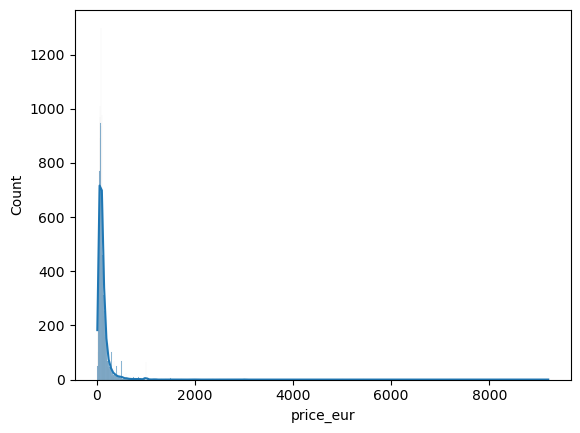

In [98]:
# price distribution plot

sns.histplot(data=df['price_eur'], stat='count', bins='auto', kde=True)

<Axes: >

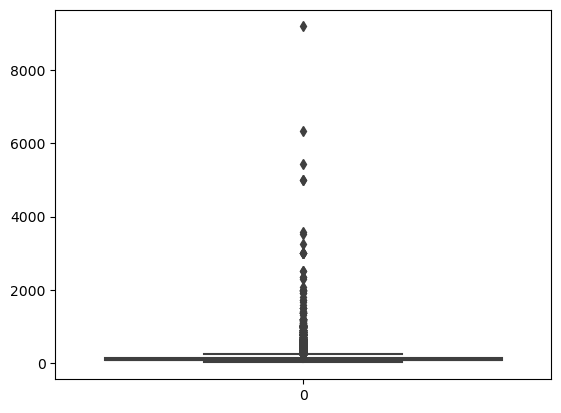

In [99]:
sns.boxplot(df['price_eur'])

The data contains many outliers in terms of price. I want to see what is considered the top 5% of most expensive airbnb's in Lisbon.

In [100]:
import data_utils.data_utils as du

In [101]:
top_5_perc = du.calculate_percentile(df, 'price_eur', 0.95)
top_5_perc

The price_eur's 0.95th percentile value is 304.59999999999854.


304.59999999999854

Homes over $304.59 are considered the top 5% most expensive AirBnB's in Lisbon. I will create a new dataframe that excludes these listings as they are more expensive than the client's interest. 

In [102]:
df_price_limit = df[df['price_eur'] < top_5_perc]

/Users/katialopes-gilbert/opt/anaconda3/envs/streamlit-demo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_eur', ylabel='Count'>

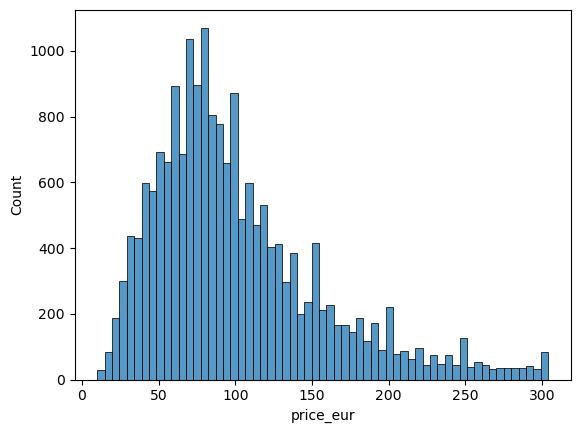

In [103]:
# price distribution plot

sns.histplot(data=df_price_limit['price_eur'], stat='count', bins='auto')

In [112]:
room_price_mean = df_price_limit.groupby('room_type')['price_eur'].mean().round(1).reset_index()
room_price_median = df_price_limit.groupby('room_type')['price_eur'].median().reset_index()
room_price_comb = pd.merge(room_price_mean, room_price_median, on="room_type", suffixes=('_mean', '_median'))
room_price_comb

,room_type,price_eur_mean,price_eur_median
0,Entire home/apt,114.7,100.0
1,Hotel room,118.6,110.0
2,Private room,59.5,50.0
3,Shared room,33.0,25.0


In [128]:
def mean_and_median_compare(df, cat_col, num_col):
    """
    Creates a new dataframe grouping the categorical column of interest and calculates the mean and median value
    of a given numerical column.

    Parameters:
    df: dataframe of interest
    cat_col: column containing categorical data
    num_col: column containing numerical data

    Returns the merged dataframes as a new mean median df.
    """
    col_mean = df.groupby(cat_col)[num_col].mean().round(1).reset_index()
    col_median = df.groupby(cat_col)[num_col].median().round(1).reset_index()
    mean_median_comb = pd.merge(col_mean, col_median, on=cat_col, suffixes=('_mean', '_median'))
    
    return mean_median_comb

In [129]:
mean_and_median_compare(df_price_limit, 'room_type', 'price_eur')

,room_type,price_eur_mean,price_eur_median
0,Entire home/apt,114.7,100.0
1,Hotel room,118.6,110.0
2,Private room,59.5,50.0
3,Shared room,33.0,25.0


In [117]:
df_prices = df_price_limit.groupby('room_type')['price_eur'].agg(['mean','median']).round(2)
df_prices

,mean,median
room_type,,
Entire home/apt,114.66,100.0
Hotel room,118.56,110.0
Private room,59.46,50.0
Shared room,32.96,25.0


In [131]:
df_rooms = mean_and_median_compare(df, 'bedrooms', 'price_eur')
df_rooms

,bedrooms,price_eur_mean,price_eur_median
0,0.0,85.5,73.0
1,1.0,88.8,73.0
2,2.0,130.9,111.0
3,3.0,186.6,151.0
4,4.0,281.5,233.5
5,5.0,388.6,329.0
6,6.0,445.3,350.0
7,7.0,603.1,431.0
8,8.0,629.1,535.0
9,9.0,607.1,535.0


I'm intrigued at the number of rooms compared to the price for both 15 and 16 from the df_rooms dataframe. I am assuming these are hotels and not rental units from a person / business. 

In [137]:
df['bedrooms'].sort_values(ascending=False).head(4)

7094     43.0
7462     22.0
3722     14.0
14977    13.0
Name: bedrooms, dtype: float64

In [135]:
df.loc[7094]

id                                                                                       44257787
listing_url                                                 https://www.airbnb.com/rooms/44257787
scrape_id                                                                          20240318023624
last_scraped                                                                           2024-03-18
source                                                                                city scrape
name                                                                   Cascais City & Beach Hotel
description                                                                  Cascais at your door
neighborhood_overview                                                                         NaN
picture_url                                     https://a0.muscache.com/pictures/e004ed24-3528...
host_id                                                                                 356688715
host_url            

In [136]:
df.loc[7462]

id                                                                                       44259232
listing_url                                                 https://www.airbnb.com/rooms/44259232
scrape_id                                                                          20240318023624
last_scraped                                                                           2024-03-18
source                                                                                city scrape
name                                                                                    Twin Room
description                                                                                   NaN
neighborhood_overview                                                                         NaN
picture_url                                     https://a0.muscache.com/pictures/9d9047d6-4695...
host_id                                                                                 356688715
host_url            

Since both of these are hotels, I am going to drop them from the dataset for further analysis. 

In [141]:
df['bedrooms'].sort_values(ascending=True).head(4)

19032    0.0
11670    0.0
10234    0.0
15942    0.0
Name: bedrooms, dtype: float64

In [145]:
df.loc[19032]

id                                                                                       18488439
listing_url                                                 https://www.airbnb.com/rooms/18488439
scrape_id                                                                          20240318023624
last_scraped                                                                           2024-03-19
source                                                                                city scrape
name                                                           Cascais Family Studio - Clean&Safe
description                                     Cascais Family Studio is a family-run, local a...
neighborhood_overview                           A poucos minutos a pé pode alcançar rapidament...
picture_url                                     https://a0.muscache.com/pictures/2229004e-0871...
host_id                                                                                 128276745
host_url            

The places listed with 0 rooms appear to be studios. 

In [138]:
df_no_hotels = df.drop(df[df['bedrooms'] >= 20].index)

In [140]:
df_rooms = mean_and_median_compare(df_no_hotels, 'bedrooms', 'price_eur')
df_rooms

,bedrooms,price_eur_mean,price_eur_median
0,0.0,85.5,73.0
1,1.0,88.8,73.0
2,2.0,130.9,111.0
3,3.0,186.6,151.0
4,4.0,281.5,233.5
5,5.0,388.6,329.0
6,6.0,445.3,350.0
7,7.0,603.1,431.0
8,8.0,629.1,535.0
9,9.0,607.1,535.0


In [148]:
df['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Lisboa                   13709
Cascais                   1909
Sintra                    1390
Mafra                     1132
Lourinh                    431
Oeiras                     358
Torres Vedras              275
Loures                     256
Amadora                    184
Odivelas                   115
Alenquer                    85
Vila Franca De Xira         82
Cadaval                     56
Sobral De Monte Agrao       25
Azambuja                    13
Arruda Dos Vinhos            9
Name: count, dtype: int64

In [150]:
df_neighbourhoods = mean_and_median_compare(df_no_hotels, 'neighbourhood_group_cleansed', 'price_eur')
df_neighbourhoods

,neighbourhood_group_cleansed,price_eur_mean,price_eur_median
0,Alenquer,180.2,100.0
1,Amadora,63.2,50.0
2,Arruda Dos Vinhos,136.2,115.0
3,Azambuja,153.9,134.0
4,Cadaval,141.1,110.0
5,Cascais,156.9,100.0
6,Lisboa,120.1,91.0
7,Loures,101.0,65.0
8,Lourinh,150.1,100.0
9,Mafra,126.8,94.0


In [156]:
df_neighbourhoods_rooms = df_no_hotels.groupby('neighbourhood_group_cleansed')['bedrooms'].mean().round(1).reset_index()
df_neighbourhoods_rooms

,neighbourhood_group_cleansed,bedrooms
0,Alenquer,2.2
1,Amadora,1.4
2,Arruda Dos Vinhos,2.0
3,Azambuja,3.4
4,Cadaval,2.2
5,Cascais,1.9
6,Lisboa,1.5
7,Loures,1.5
8,Lourinh,2.5
9,Mafra,2.0


In [157]:
host_listings_df = df[['id', 'latitude', 'longitude', 'host_id', 'host_name', 'host_listings_count', 'host_total_listings_count']]\
                .sort_values('host_total_listings_count', ascending=False)
host_listings_df.head()

,id,latitude,longitude,host_id,host_name,host_listings_count,host_total_listings_count
11412,791236321001595580,38.69551,-9.45568,174792040,RoomPicks By Victoria,1917,8919
11411,791236320332153450,38.69592,-9.45635,174792040,RoomPicks By Victoria,1917,8919
11554,548916636583326827,38.70327,-9.47526,174792040,RoomPicks By Victoria,1917,8919
11409,776082752424877983,38.69740,-9.45494,174792040,RoomPicks By Victoria,1917,8919
11397,791236323863716667,38.69605,-9.45480,174792040,RoomPicks By Victoria,1917,8919


In [52]:
host_listings_count = host_listings_df.groupby(['host_name', 'host_id'])['id'].count().reset_index()\
                     .sort_values('id', ascending=False)

In [53]:
host_listings_count.head(20)

,host_name,host_id,id
2383,Feels Like Home,3953109,238
1037,Blueground,447375630,219
7795,Ukio,419162816,159
1039,BnBird,76223539,145
245,Altido,1756107,116
181,Alexandra Pedro And Team,5691663,98
2549,Flavio,185898036,97
4309,LisBeyond,15900664,70
102,Albertino,2372087,59
4589,Luís,186448151,58
